/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'i

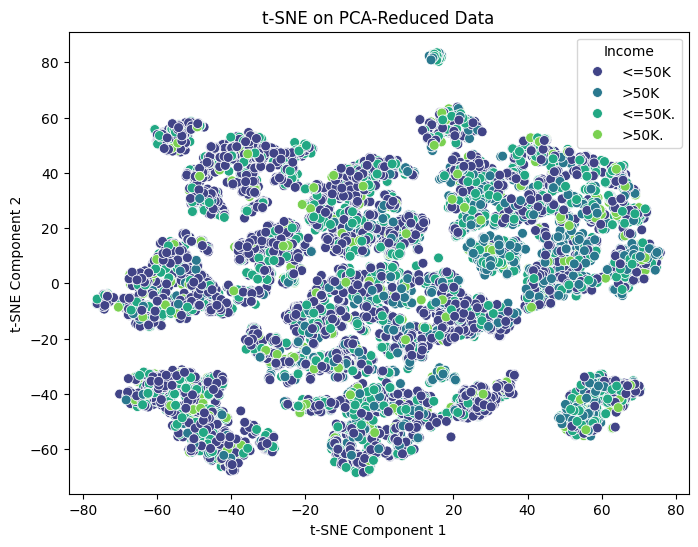

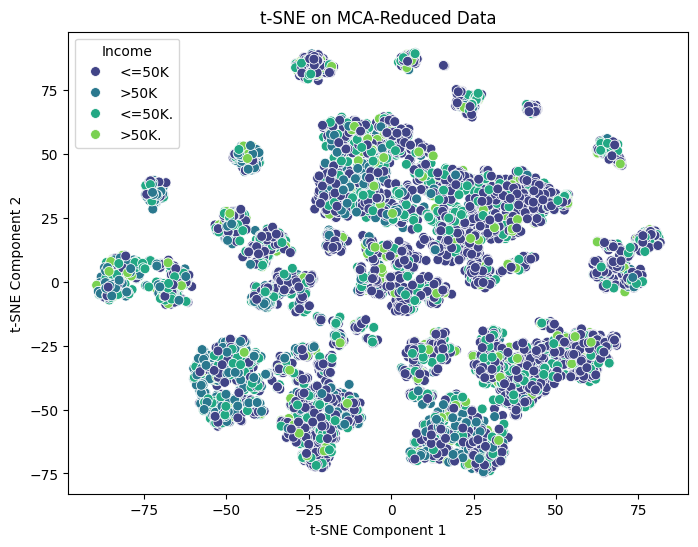

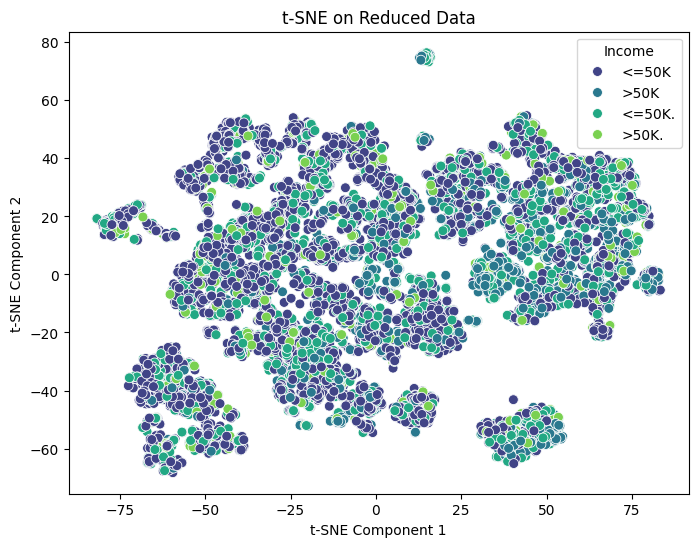

In [16]:
%run -i TSNE.ipynb

# KMeans

In [17]:
best_kmeans = None
best_silhouette = -1
best_i = -1

for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, random_state=68)
    kmeans_labels = kmeans.fit_predict(X_combined)
    score = silhouette_score(X_combined, kmeans_labels)
    if score > best_silhouette:
        best_silhouette = score
        best_kmeans = kmeans_labels
        best_i = i

print(f"{best_i} has the best K-Means Silhouette Score: {best_silhouette:.2f}")


/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

2 has the best K-Means Silhouette Score: 0.48


# GMM

In [18]:
from sklearn.mixture import GaussianMixture

best_gmm = None
best_silhouette = -1
best_i = -1

for i in range(2, 30):
    gmm = GaussianMixture(n_components=i, random_state=68)
    gmm_labels = gmm.fit_predict(X_combined)
    score = silhouette_score(X_combined, gmm_labels)
    if score > best_silhouette:
        best_silhouette = score
        best_gmm = gmm_labels
        best_i = i

print(f"{best_i} has the best GMM Silhouette Score: {best_silhouette:.2f}")

2 has the best GMM Silhouette Score: 0.28


# DBSCAN

In [19]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_combined)

dbscan_silhouette = silhouette_score(X_combined, dbscan_labels)
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.2f}")


DBSCAN Silhouette Score: -0.33


# HDBSCAN

In [21]:
import hdbscan

hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5)
hdbscan_labels = hdbscan_model.fit_predict(X_combined)

hdbscan_silhouette = silhouette_score(X_combined, hdbscan_labels)
print(f"HDBSCAN Silhouette Score: {hdbscan_silhouette:.2f}")

HDBSCAN Silhouette Score: 0.77


# Plot

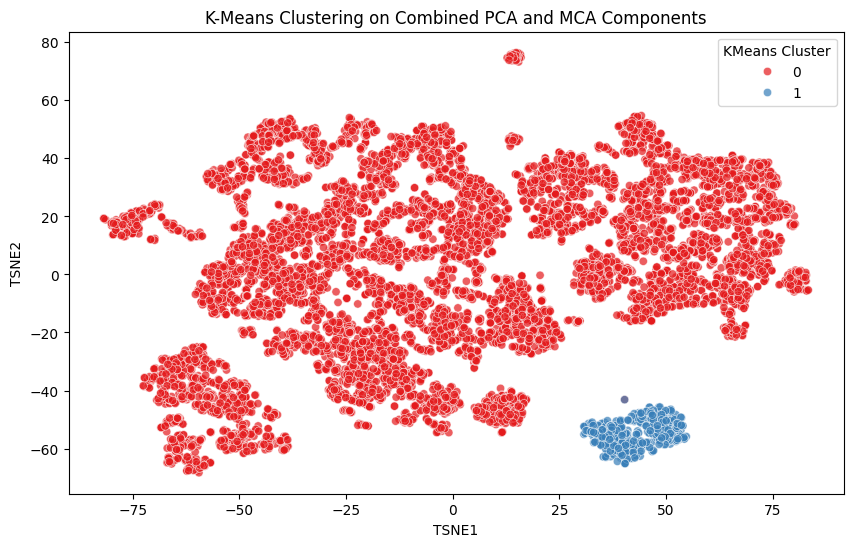

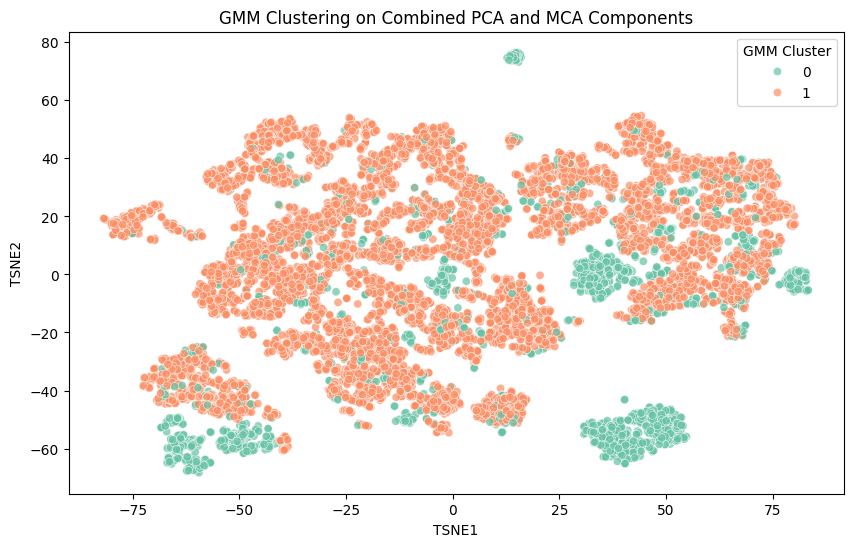

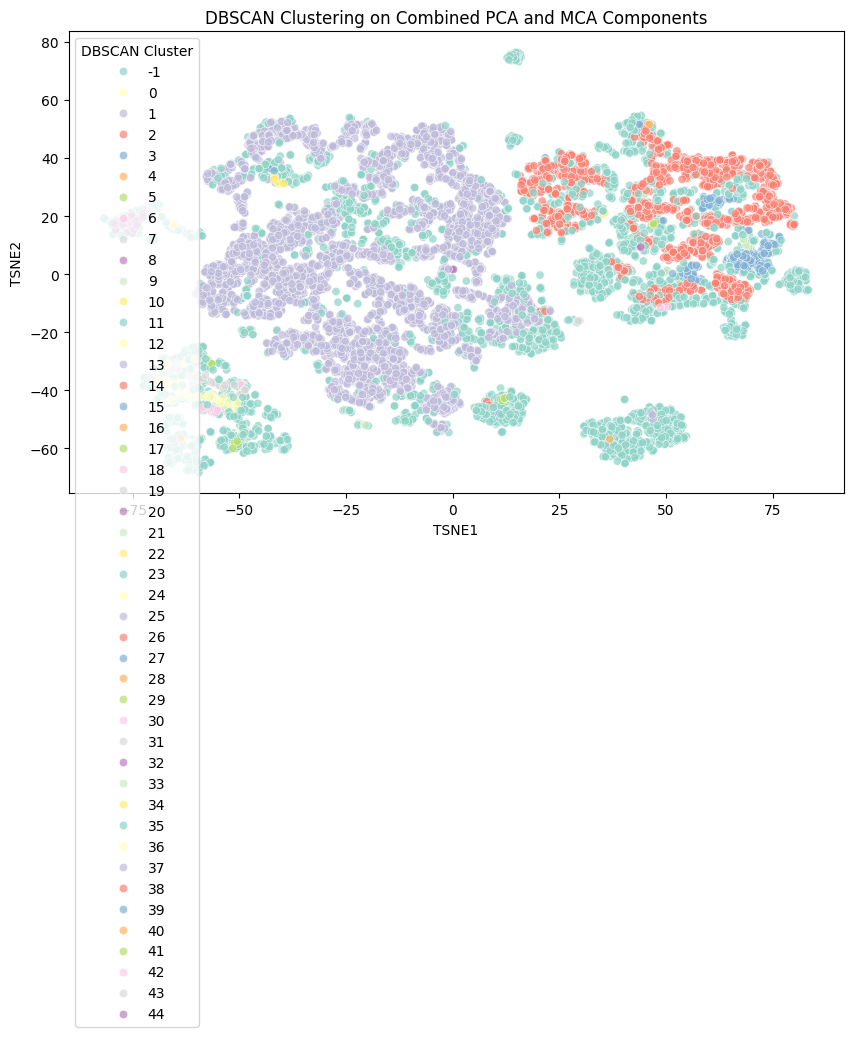

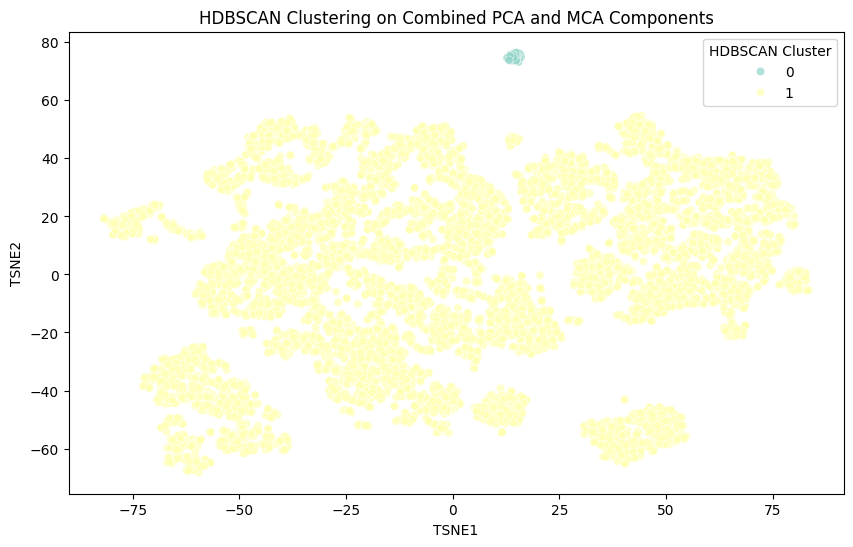

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['KMeans Cluster'] = best_kmeans
tsne_df['GMM Cluster'] = best_gmm
tsne_df['DBSCAN Cluster'] = dbscan_labels
tsne_df['HDBSCAN Cluster'] = hdbscan_labels

# Plot K-Means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='KMeans Cluster', palette='Set1', alpha=0.7)
plt.title('K-Means Clustering on Combined PCA and MCA Components')
plt.show()

# Plot GMM clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='GMM Cluster', palette='Set2', alpha=0.7)
plt.title('GMM Clustering on Combined PCA and MCA Components')
plt.show()

# Plot DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='DBSCAN Cluster', palette='Set3', alpha=0.7)
plt.title('DBSCAN Clustering on Combined PCA and MCA Components')
plt.show()

# Plot HDBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='HDBSCAN Cluster', palette='Set3', alpha=0.7)
plt.title('HDBSCAN Clustering on Combined PCA and MCA Components')
plt.show()


# Other Score Methods

In [24]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

kmeans_davies_bouldin = davies_bouldin_score(X_combined, best_kmeans)
kmeans_calinski_harabasz = calinski_harabasz_score(X_combined, best_kmeans)

gmm_calinski_harabasz = calinski_harabasz_score(X_combined, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(X_combined, gmm_labels)

dbscan_davies_bouldin = davies_bouldin_score(X_combined, dbscan_labels)
dbscan_calinski_harabasz = calinski_harabasz_score(X_combined, dbscan_labels)

print(f"K-Means Davies-Bouldin Index: {kmeans_davies_bouldin:.2f}")
print(f"K-Means Calinski-Harabasz Index: {kmeans_calinski_harabasz:.2f}")
print(f"GMM Davies-Bouldin Index: {gmm_davies_bouldin:.2f}")
print(f"GMM Calinski-Harabasz Index: {gmm_calinski_harabasz:.2f}")
print(f"DBSCAN Davies-Bouldin Index: {dbscan_davies_bouldin:.2f}")
print(f"DBSCAN Calinski-Harabasz Index: {dbscan_calinski_harabasz:.2f}")

K-Means Davies-Bouldin Index: 0.87
K-Means Calinski-Harabasz Index: 1824.28
GMM Davies-Bouldin Index: 4.42
GMM Calinski-Harabasz Index: 412.68
DBSCAN Davies-Bouldin Index: 1.72
DBSCAN Calinski-Harabasz Index: 33.86


# Isolation Forest

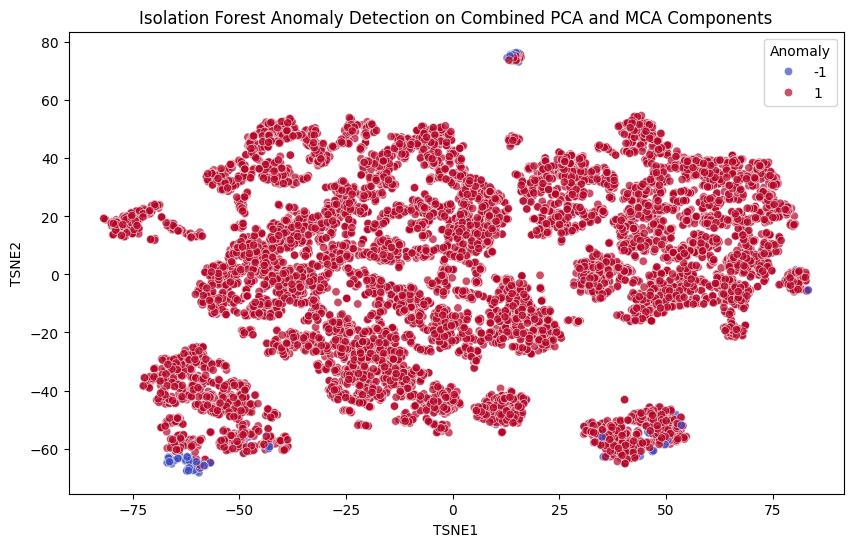

In [25]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=29)
iso_labels = iso_forest.fit_predict(X_combined)

# Add anomaly labels to t-SNE DataFrame
tsne_df['Anomaly'] = iso_labels

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Anomaly', palette='coolwarm', alpha=0.7)
plt.title('Isolation Forest Anomaly Detection on Combined PCA and MCA Components')
plt.show()
